# Assignment1
2021021581 임진하<br>
2021021699 이유원<br>
2021011207 박지훈

## Part1

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time
from IPython import display
from mpl_toolkits import mplot3d

In [2]:
class gradient:
    def __init__(self, lr):
        self.lr = lr
        self.grad_w = 0
        self.grad_b = 0
        self.tolerance_w = 0
        self.tolerance_b = 0

    def calculate(self, x ,y, w, b):
        grad_w = 0
        grad_b = 0
        for i in range(len(x)):
            grad_w += -2 * x[i] * (y[i] - (w * x[i] + b))
            grad_b += -2 * (y[i] - (w * x[i] + b))

        grad_w /= len(x)
        grad_b /= len(x)

        self.tolerance_w = np.abs(self.grad_w - grad_w)
        self.tolerance_b = np.abs(self.grad_b - grad_b)

        self.grad_w = grad_w
        self.grad_b = grad_b

    def update(self, w, b):
        w -= self.lr * self.grad_w
        b -= self.lr * self.grad_b
        return w, b

    def train(self, x, y, w, b):
        self.calculate(x, y, w, b)
        updated_w, updated_b = self.update(w, b)
        return updated_w, updated_b


In [3]:
# Define funtion that plot loss function
def plot_loss(loss_history):
    plt.figure(figsize=(10,7))
    display.clear_output(wait=True)
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    time.sleep(0.01)
    plt.show()

In [4]:
# define a function that plot loss landscape and the path of gradient descent
def plot_surface(x, y, w, b, loss_history, w_history, b_history):
    # plot loss landscape
    fig = plt.figure(figsize=(10,7))
    display.clear_output(wait=True)
    ax = plt.axes(projection='3d')
    w_range = np.arange(-5, 5, 0.1)
    b_range = np.arange(-5, 5, 0.1)
    w_mesh, b_mesh = np.meshgrid(w_range, b_range)
    loss = np.zeros(w_mesh.shape)
    for i in range(w_mesh.shape[0]):
        for j in range(w_mesh.shape[1]):
            loss[i,j] = np.mean((y - (w_mesh[i,j] * x + b_mesh[i,j]))**2)
    ax.plot_surface(w_mesh, b_mesh, loss, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('loss')
    ax.view_init(30, 60)

    # plot the path of gradient descent
    ax.scatter(w_history, b_history, loss_history, c='r', marker='x')
    
    time.sleep(0.01)
    plt.show()

In [5]:
# Define the funcion of 2D gradient algorithm
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-3, online_loss_plot=False):
    # Initialize the parameters
    w = initial[0]
    b = initial[1]
    loss_history = []
    # Start the iteration
    for i in range(max_iter):
        # Calculate the gradient and update the parameters
        w, b = gradient.train(X, Y, w, b)
        
        tolerance_w = gradient.tolerance_w
        tolerance_b = gradient.tolerance_b
        
        # Calculate the loss
        y_hat = [w * x_i for x_i in X] + b
        loss = ((y_hat - Y)**2).mean()
        loss_history.append(loss)
        
        # Plot the loss function
        if online_loss_plot:
            plot_loss(loss_history)
        
        # Stop the iteration if the loss is small
        if tolerance_w < stop_tolerance and tolerance_b < stop_tolerance:
            break
        
    return w, b, loss_history

## Part2

In [6]:
def experiment(X, Y, lrs):
    for lr in lrs:
        # Initialize the parameters
        np.random.seed(119)
        init_weight = np.random.normal(0,1)
        init_bias = np.random.normal(0,1)
        initial = [init_weight, init_bias]
        # Start the gradient descent
        grad = gradient(lr)
        w, b, loss_hist = gradient_descent(grad, X, Y, initial, learning_rate=lr, max_iter=500, stop_tolerance=1e-3, online_loss_plot=False)
        iteration = len(loss_hist)
        # Print the final results
        print("Iteration: {0}, w = {1:.5f}, b = {2:.5f}".format(iteration, w, b))
        # Plot the loss function
        y_hat = [w * x_i + b for x_i in X]

        # plot data and best-fit lines
        fig = plt.figure(figsize=(10,8))
        plt.plot(X, Y, 'o', X, y_hat, '--')
        plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

        fig.suptitle('Student Data : Expected Grades vs Hours of Study, lr={}'.format(lr), fontsize=18)
        plt.xlabel('study time [hours]', fontsize=14)
        plt.ylabel('expected grade [points]', fontsize=14)
        plt.grid()
        plt.show()

In [7]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
print(data.shape)
X = data[:, 0]
Y = data[:, 1]

(100, 2)


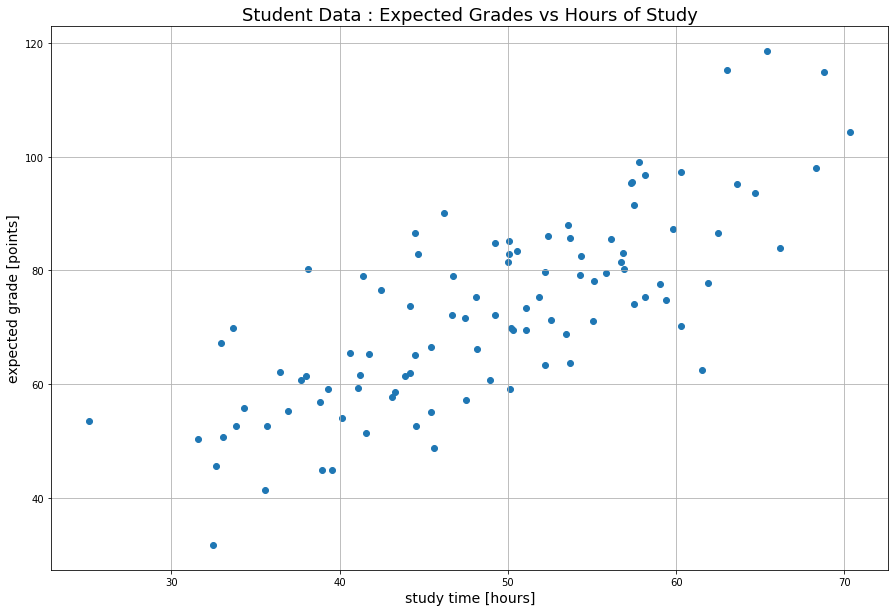

In [8]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X, Y)
plt.title('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()

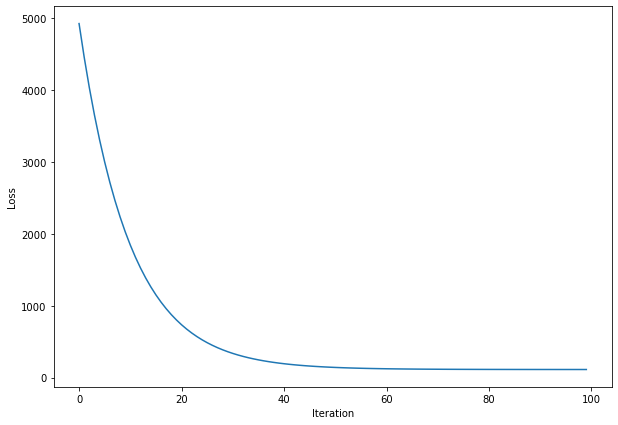

In [9]:
np.random.seed(119)
init_weight = np.random.normal(0,1)
init_bias = np.random.normal(0,1)
initial = [init_weight, init_bias]

grad = gradient(lr=1e-5)

weight, bias, loss_hist = gradient_descent(grad, X, Y, initial, learning_rate=1e-4, max_iter=100, stop_tolerance=1e-3, online_loss_plot=True)

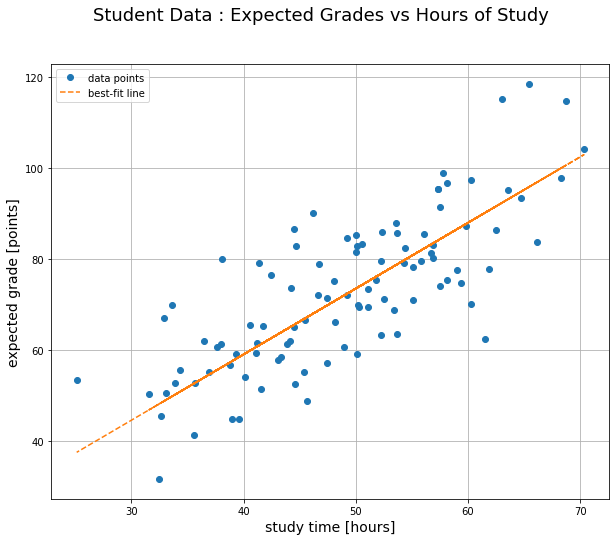

In [10]:
fig = plt.figure(figsize=(10,8))

y_hat = [weight * x_i + bias for x_i in X]

# plot data and best-fit lines
plt.plot(X, Y, 'o', X, y_hat, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()

Iteration: 500, w = nan, b = nan


/home/yuwon/anaconda3/envs/DL/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_2172/563441169.py:17: RuntimeWarning: overflow encountered in square
  loss = ((y_hat - Y)**2).mean()
/tmp/ipykernel_2172/3322088299.py:13: RuntimeWarning: overflow encountered in double_scalars
  grad_w += -2 * x[i] * (y[i] - (w * x[i] + b))
/tmp/ipykernel_2172/3322088299.py:26: RuntimeWarning: invalid value encountered in double_scalars
  w -= self.lr * self.grad_w


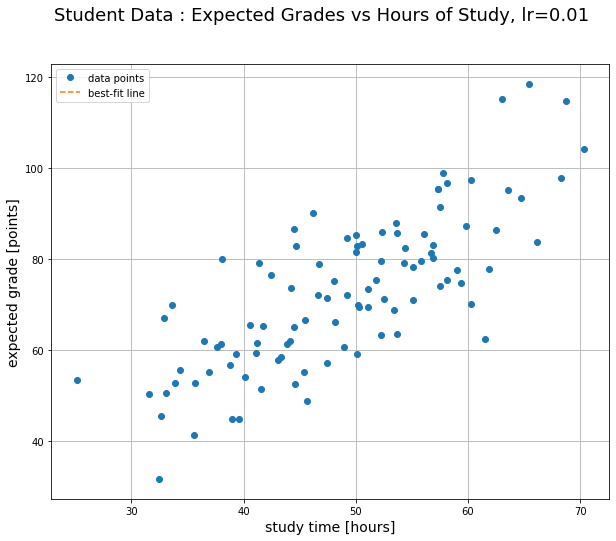

/home/yuwon/anaconda3/envs/DL/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_2172/563441169.py:17: RuntimeWarning: overflow encountered in square
  loss = ((y_hat - Y)**2).mean()


Iteration: 500, w = -2072493850310178366621608677136492591295036873038921788848066762347118779661418734944642930698688235588600523220931183824934690993125054316937807354823644254015518754500395441186242336041706836758102867300891836552202594027520474166224041127925583951815096296588041158913062214493208791809361308549120.00000, b = -40734235163116720107612864796570297819598160468719493880389346940330641961823679418235646100340742175960259919094391026029914827090317992342272386498438917191804965421449356494435648831880423221203195382242907544514854817614599605767334895315834656817412021759610102484765515069240655457041667588096.00000


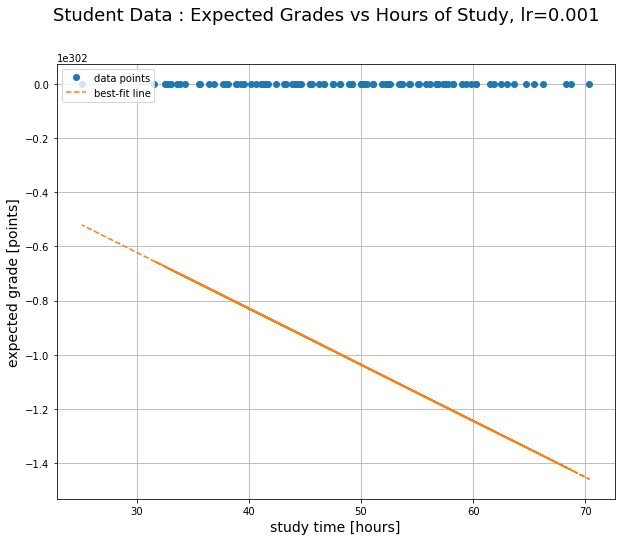

Iteration: 24, w = 1.45523, b = 1.23467


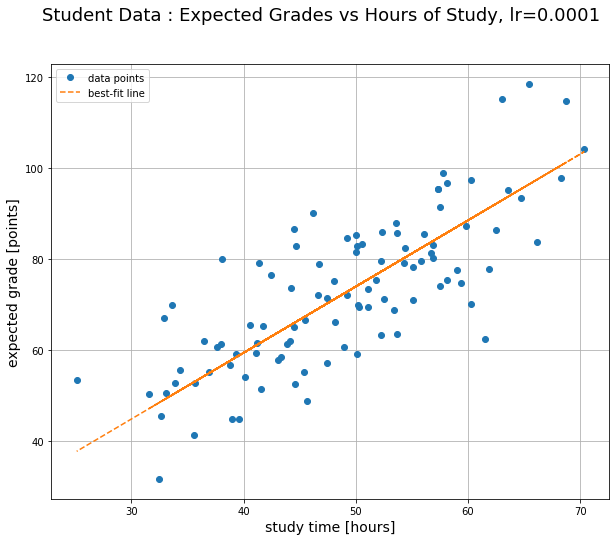

Iteration: 253, w = 1.45522, b = 1.23473


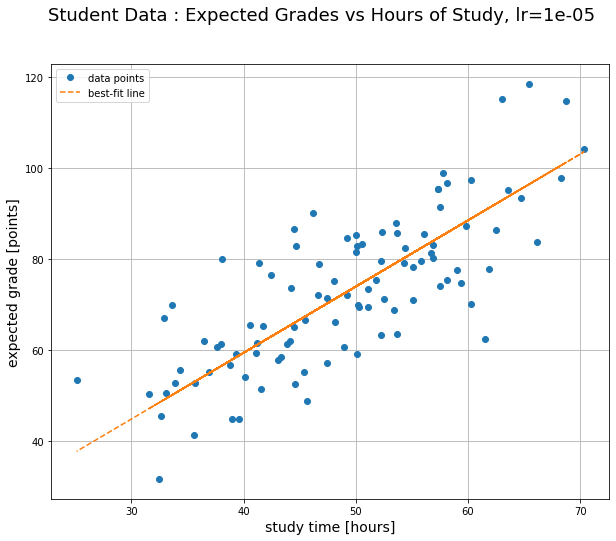

Iteration: 500, w = 1.33495, b = 1.23133


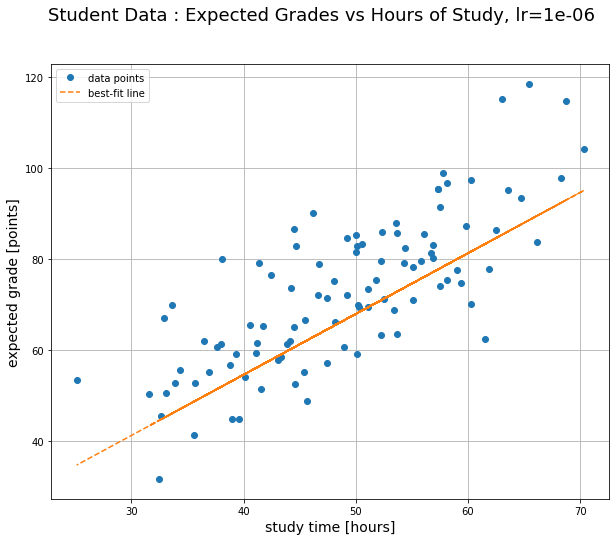

In [11]:
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
experiment(X, Y, learning_rates)

The learning rate for the best result is 0.0001<br>
Learning rate0.0001 converges at iteration 24 and other smaller than 0.0001 needs more iteration<br>
Larger than 0.0001 does not converge.

## Exponential optimization

(421, 17)


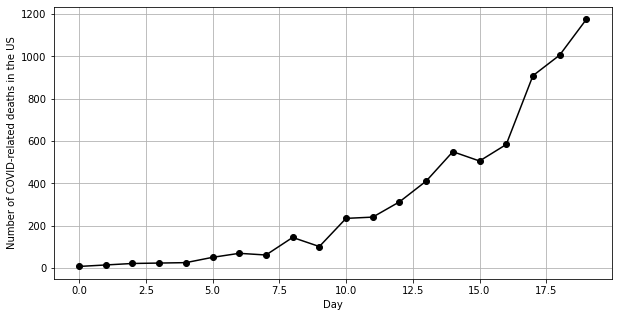

In [7]:
data = np.genfromtxt('national-history.csv', delimiter=',')
print(data.shape)
X = np.arange(0,20)
Y = data[340:360, 2]
Y = np.flip(Y)
fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()

In [22]:
class gradient_nl:
    def __init__(self, lr):
        self.lr = lr
        self.grad_w = 0
        self.grad_b = 0
        self.tolerance_w = 0
        self.tolerance_b = 0

    def calculate(self, x ,y, w, b):
        grad_w = 0
        grad_b = 0
        for i in range(len(x)):
            grad_w += -2 * x[i] * (y[i] - np.exp(w * x[i] + b)) * np.exp(w * x[i] + b)
            grad_b += -2 * (y[i] - np.exp(w * x[i] + b)) * np.exp(w * x[i] + b)
            # grad_w += (2*np.exp(w*x[i]+b) * x[i]) / (np.exp(w*x[i]+b) - y[i])
            # grad_b += (2*np.exp(w*x[i]+b)) / (np.exp(w*x[i]+b) - y[i])

        grad_w /= len(x)
        grad_b /= len(x)    

        self.tolerance_w = np.abs(self.grad_w - grad_w)
        self.tolerance_b = np.abs(self.grad_b - grad_b)

        self.grad_w = grad_w
        self.grad_b = grad_b

    def update(self, w, b):
        w -= self.lr * self.grad_w
        b -= self.lr * self.grad_b
        return w, b

    def train(self, x, y, w, b):
        self.calculate(x, y, w, b)
        updated_w, updated_b = self.update(w, b)
        return updated_w, updated_b


In [23]:
# Define the funcion of 2D gradient algorithm
def gradient_descent_nl(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-3, online_loss_plot=False):
    # Initialize the parameters
    w = initial[0]
    b = initial[1]
    loss_history = []
    # Start the iteration
    for i in range(max_iter):
        # Calculate the gradient and update the parameters
        w, b = gradient.train(X, Y, w, b)
        
        tolerance_w = gradient.tolerance_w
        tolerance_b = gradient.tolerance_b
        
        # Calculate the loss
        y_hat = [np.exp(w * x_i + b) for x_i in X]
        loss = np.mean(np.log(np.square((Y - np.exp(w * X + b)))))
        loss_history.append(loss)
        
        # Plot the loss function
        if online_loss_plot:
            plot_loss(loss_history)
        
        # Stop the iteration if the loss is small
        if tolerance_w < stop_tolerance and tolerance_b < stop_tolerance:
            break
        
    return w, b, loss_history

In [24]:
def log_transform(Y):
    log_Y = np.log(Y)
    return log_Y

In [25]:
def experiment_nl(X, Y, lrs):
    for lr in lrs:
        # Initialize the parameters
        np.random.seed(119)
        init_weight = np.random.normal(0,1)
        init_bias = np.random.normal(0,1)
        initial = [init_weight, init_bias]
        # Start the gradient descent
        grad = gradient_nl(lr)
        w, b, loss_hist = gradient_descent_nl(grad, X, Y, initial, learning_rate=lr, max_iter=500, stop_tolerance=1e-3, online_loss_plot=False)
        iteration = len(loss_hist)
        # Print the final results
        print("Iteration: {0}, w = {1:.5f}, b = {2:.5f}".format(iteration, w, b))
        # Plot the loss function
        y_hat = [np.exp(w * x_i + b) for x_i in X]

        # plot data and best-fit lines
        fig = plt.figure(figsize=(10,8))

        plt.plot(X, Y, 'o', X, y_hat, '--')
        fig.suptitle('Covid Outbreak data : Death toll due,  lr={}'.format(lr), fontsize=18)
        plt.xlabel('Day')
        plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])
        plt.ylabel('Number of COVID-related deaths in the US')
        plt.grid()
        plt.show()

Iteration: 4, w = -32298072326920801542471680.00000, b = -1703873503188749847101440.00000


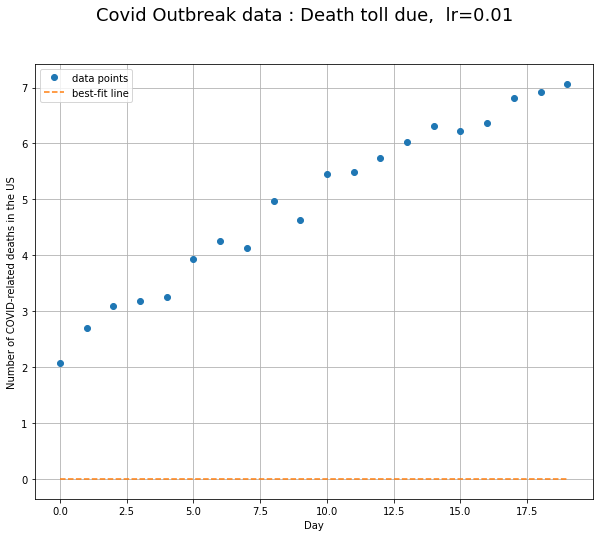

Iteration: 4, w = -18.32458, b = 0.09825


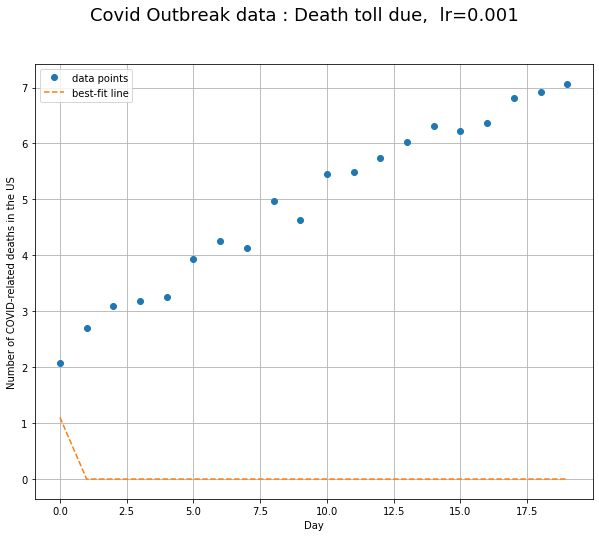

Iteration: 112, w = 0.04214, b = 1.19641


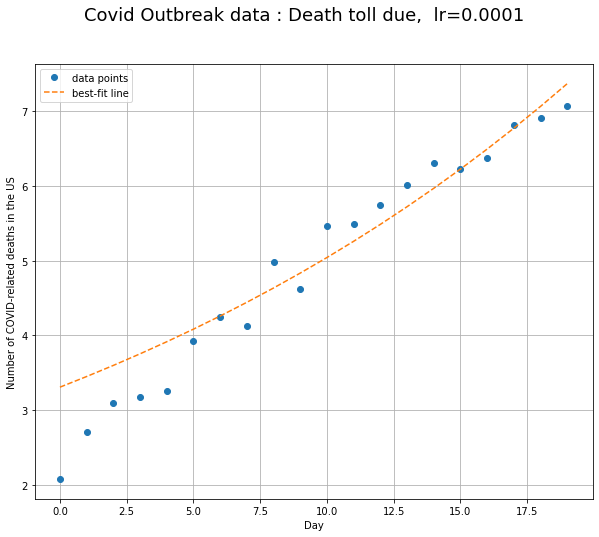

Iteration: 124, w = 0.04142, b = 1.20684


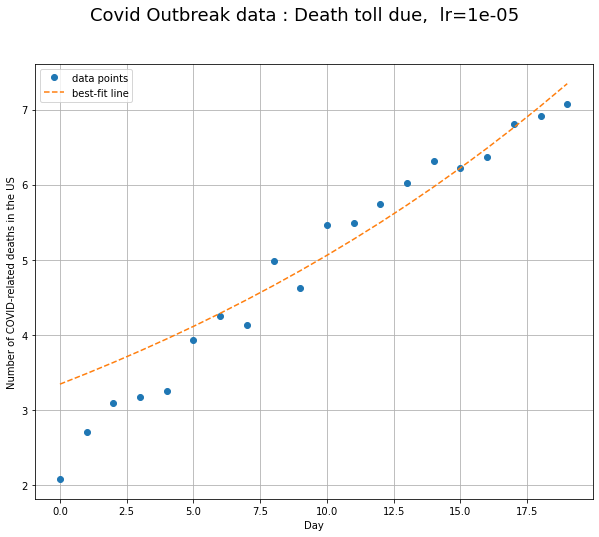

Iteration: 500, w = 0.03972, b = 1.20754


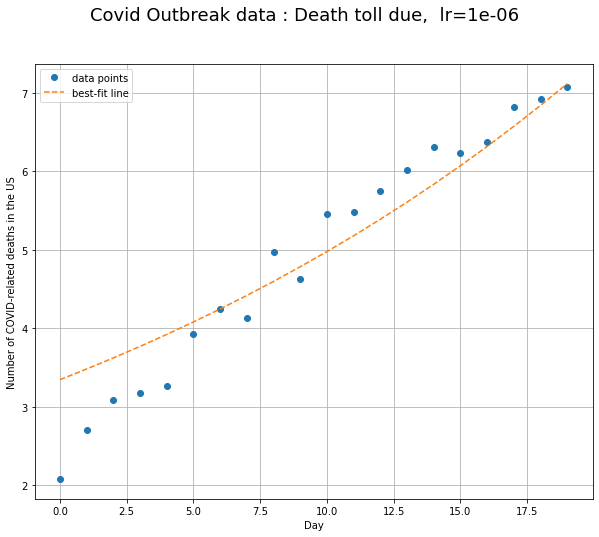

In [26]:
log_Y = log_transform(Y)
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
experiment_nl(X, log_Y, learning_rates)

## Bonus

In [18]:
# define a function that plot loss landscape and the path of gradient descent
def plot_surface(x, y, w, b, loss_history, w_history, b_history):
    # plot loss landscape
    fig = plt.figure(figsize=(10,7))
    display.clear_output(wait=True)
    ax = plt.axes(projection='3d')
    w_range = np.arange(-5, 5, 0.1)
    b_range = np.arange(-5, 5, 0.1)
    w_mesh, b_mesh = np.meshgrid(w_range, b_range)
    loss = np.zeros(w_mesh.shape)
    for i in range(w_mesh.shape[0]):
        for j in range(w_mesh.shape[1]):
            loss[i,j] = np.mean((y - (w_mesh[i,j] * x + b_mesh[i,j]))**2)
    ax.plot_surface(w_mesh, b_mesh, loss, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('loss')
    ax.view_init(30, 60)

    # plot the path of gradient descent
    ax.scatter(w_history, b_history, loss_history, c='r', marker='x')
    
    time.sleep(0.01)
    plt.show()

In [19]:
# Define the funcion of 2D gradient algorithm
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-3, online_loss_plot=False, online_surf_plot=False):
    # Initialize the parameters
    w = initial[0]
    b = initial[1]
    loss_history = []
    w_history = []
    h_history = []
    # Start the iteration
    for i in range(max_iter):
        # Calculate the gradient and update the parameters
        w, b = gradient.train(X, Y, w, b)
        w_history.append(w)
        h_history.append(b)
        
        tolerance_w = gradient.tolerance_w
        tolerance_b = gradient.tolerance_b
        
        # Calculate the loss
        y_hat = [w * x_i for x_i in X] + b
        loss = ((y_hat - Y)**2).mean()
        loss_history.append(loss)
        
        # Plot the loss function
        if online_loss_plot:
            plot_loss(loss_history)
        
        # Plot the loss surface
        if online_surf_plot:
            plot_surface(X, Y, w, b, loss_history, w_history, h_history)
        
        # Stop the iteration if the loss is small
        if tolerance_w < stop_tolerance and tolerance_b < stop_tolerance:
            break
        
    return w, b, loss_history